# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [8]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    if ad==4 and n<100:
        print(reward, n, ad, random_beta)
    total_reward = total_reward + reward

0 2 4 0.6273486683487214
0 22 4 0.20100324008190493
0 23 4 0.06639452932171103
0 48 4 0.07922545310018561
1 49 4 0.26910793901623664
1 54 4 0.3531745223832053
0 57 4 0.17314616256278967
0 59 4 0.21635152117617315
0 60 4 0.31114934727021404
1 66 4 0.1571365676969403
0 68 4 0.15316657806577266
0 74 4 0.24624501272907587
0 76 4 0.06851079750935872
1 78 4 0.3125555686234718
0 79 4 0.047682873911734945
0 86 4 0.23881459667493526
1 98 4 0.22458245228809573
1 99 4 0.17278068904150676


In [4]:
print(total_reward)

2587


## Visualising the results - Histogram

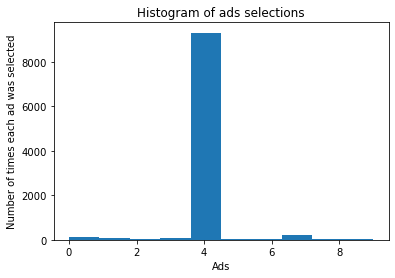

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()